<a href="https://colab.research.google.com/github/shivansh200501/Real-Time-Vehicle-Safety-System/blob/main/semantic_point__cloud_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import random
import glob

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf

from easydict import EasyDict
import plotly.graph_objects as go


tf.random.set_seed(42)
random.seed(123)

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 12)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading data
train_path = "drive/My Drive/dataset/pcl_segmentation/train"
val_path = "drive/My Drive/dataset/pcl_segmentation/val"

train_pathes = sorted(glob.glob(os.path.join(train_path, "*.npy")))
val_pathes = sorted(glob.glob(os.path.join(val_path, "*.npy")))

In [ ]:
print("Number of training samples: ", len(train_pathes))
print("Number of validation samples: ", len(val_pathes))

Number of training samples:  200
Number of validation samples:  50


In [ ]:
#found online

cfg = EasyDict()

# Class name definitions
cfg.CLASSES = ['Road',
              'Sidewalk',
              'Building',
              'Pole',
              'Vegetation',
              'Person',
              'TwoWheeler',
              'Car',
              'Truck',
              'Bus',
              "None"]

cfg.NUM_CLASS = len(cfg.CLASSES)

# Color class association
# e.g. Index 0 corresponds to color [128, 64, 128] and class 'Road'
cfg.CLS_COLOR_MAP = np.array([[128,  64,  128],  # Road
                              [244,  35,  232],  # Sidewalk
                              [70,   70,   70],  # Building
                              [153, 153,  153],  # Pole
                              [107, 142,   35],  # Vegetation
                              [220,  20,   60],  # Person
                              [255,   0,    0],  # Two Wheeler
                              [0,     0,  142],  # Car
                              [0,     0,   70],  # Truck
                              [0,    60,  100],  # Bus
                              [0,     0,    0]   # None
                              ]) / 255.0

In [ ]:
sample = np.load(train_pathes[0])
print("Sample shape:", sample.shape)

Sample shape: (32, 240, 6)


In [ ]:
print("X-Coordinate in [m]: \t", sample[15, 121, 0])

print("Y-Coordinate in [m]: \t", sample[15, 121, 1])

print("Z-Coordinate in [m]: \t", sample[15, 121, 2])

print("Intensity: \t\t", sample[15, 121, 3])

print("Depth in [m]: \t\t", sample[15, 121, 4])

X-Coordinate in [m]: 	 46.449241638183594
Y-Coordinate in [m]: 	 0.58329838514328
Z-Coordinate in [m]: 	 -1.0821075439453125
Intensity: 		 67.0
Depth in [m]: 		 46.465511322021484


In [ ]:
print("Calculated Depth:", np.sqrt( sample[15, 121, 0]**2 + sample[15, 121, 1]**2 + sample[15, 121, 2]**2 ))

Calculated Depth: 46.465505942636014


In [ ]:
print("X-Coordinate in [m]: \t", sample[31, 120, 0])

print("Y-Coordinate in [m]: \t", sample[31, 120, 1])

print("Z-Coordinate in [m]: \t", sample[31, 120, 2])

print("Intensity: \t\t", sample[31, 120, 3])

print("Depth in [m]: \t\t", sample[31, 120, 4])

X-Coordinate in [m]: 	 0.0
Y-Coordinate in [m]: 	 0.0
Z-Coordinate in [m]: 	 0.0
Intensity: 		 0.0
Depth in [m]: 		 0.0


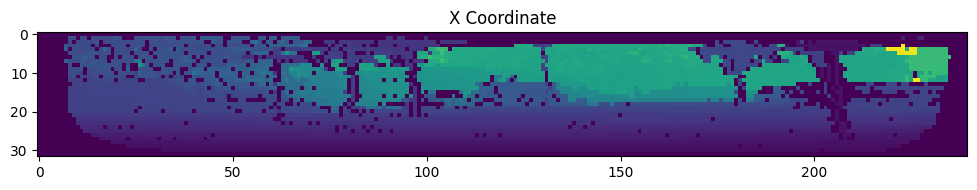

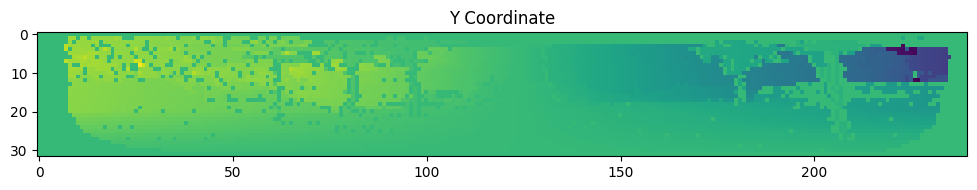

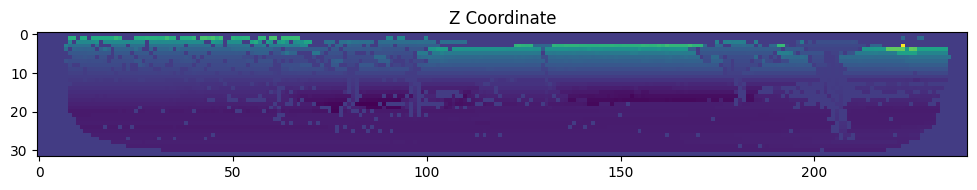

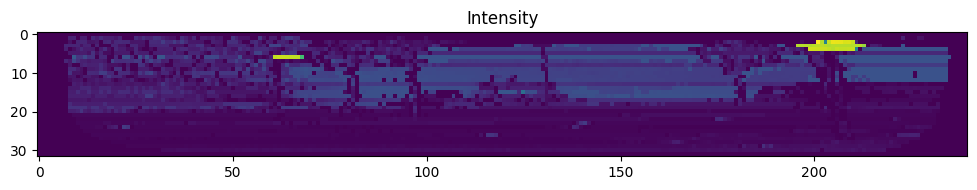

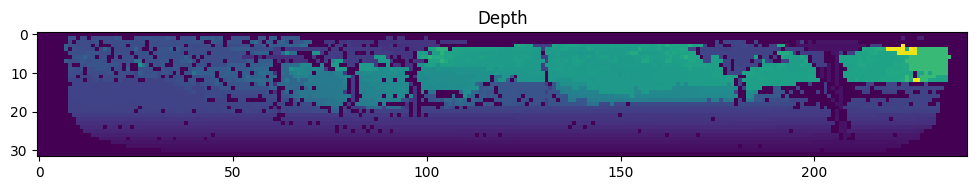

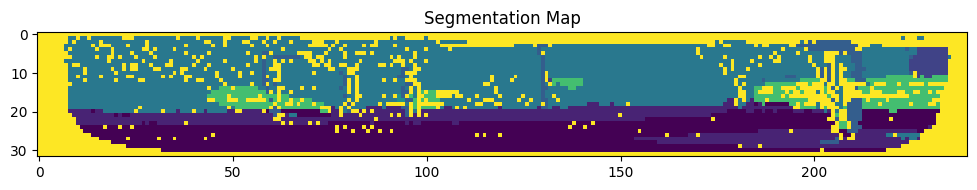

In [ ]:
plt.imshow(sample[:, :, 0])
plt.title("X Coordinate")
plt.show()

plt.imshow(sample[:, :, 1])
plt.title("Y Coordinate")
plt.show()

plt.imshow(sample[:, :, 2])
plt.title("Z Coordinate")
plt.show()

plt.imshow(sample[:, :, 3])
plt.title("Intensity")
plt.show()

plt.imshow(sample[:, :, 4])
plt.title("Depth")
plt.show()

plt.imshow(sample[:, :, 5])
plt.title("Segmentation Map")
plt.show()

In [ ]:
list_of_points = sample.reshape((-1, 6))
points = list_of_points[:, :3]
colors = cfg.CLS_COLOR_MAP[list_of_points[:, 5].astype(np.int32)]

fig = go.Figure(
    data=[
        go.Scatter3d(
            x=points[:,0], y=points[:,1], z=points[:,2],
            mode='markers',
            marker=dict(size=1.75, color=colors)
        )
    ],
    layout=dict(
        scene=dict(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False)
        )
    )
)
fig.show()

In [ ]:
def segmentation_map_to_rgb_encoding(segmentation_map, class_color_map):
    shape = segmentation_map.shape
    #print(shape)
    segmentation_map = segmentation_map.flatten()
    #print(segmentation_map.shape)
    segmentation_map = segmentation_map.astype(np.int32)
    #print(segmentation_map.shape)
    rgb_encoding = class_color_map[segmentation_map]
    #print(rgb_encoding.shape)
    rgb_encoding = np.reshape(rgb_encoding,(shape[0],shape[1],3))


    return rgb_encoding

(32, 240)
(7680,)
(7680,)
(7680, 3)
(32, 240)
(7680,)
(7680,)
(7680, 3)
(32, 240)
(7680,)
(7680,)
(7680, 3)
(32, 240)
(7680,)
(7680,)
(7680, 3)
(32, 240)
(7680,)
(7680,)
(7680, 3)
(32, 240)
(7680,)
(7680,)
(7680, 3)
(32, 240)
(7680,)
(7680,)
(7680, 3)
(32, 240)
(7680,)
(7680,)
(7680, 3)


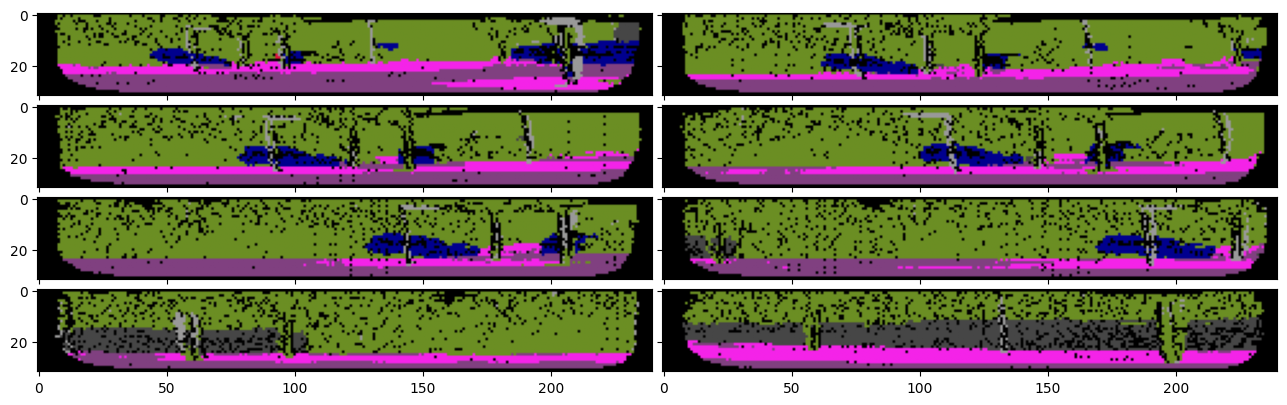

In [ ]:
#testing the function

fig = plt.figure(figsize=(16, 16))

grid = ImageGrid(fig, 111,
                 nrows_ncols=(4, 2),
                 axes_pad=0.1,
                 )

for i, ax in enumerate(grid):
    sample = np.load(train_pathes[i*6])
    segmentation_map = sample[:, :, 5]
    rgb_encoding = segmentation_map_to_rgb_encoding(segmentation_map, cfg.CLS_COLOR_MAP)
    ax.imshow(rgb_encoding)

In [ ]:
#We can use the cfg dict to store some fundamental constants. From the dataset inspection we know that the 2D shape for each sample is [32, 240].
#And we have for each point 5 features (x, y, z, intensity, depth) and a label. In this approach we will generate an additional feature of each point.
#That will be a binary mask if a point on the current position is existent or not.
cfg.AZIMUTH_LEVEL = 240
cfg.ZENITH_LEVEL = 32
cfg.NUM_FEATURES = 6
cfg.BATCH_SIZE = 4

In [ ]:
# x, y, z, intensity, distance precalculated according to dataset
cfg.INPUT_MEAN = np.array([[[24.810, 0.819, 0.000, 16.303, 25.436]]])
cfg.INPUT_STD =  np.array([[[30.335, 7.807, 2.058, 25.208, 30.897]]])

In [ ]:
def parse_sample(sample_path):

    sample = np.load(sample_path.numpy()).astype(np.float32, copy=False)
    original_shape = np.shape(sample)
    lidar = sample[:,:,0:5]
    mask = lidar[:, :, 4] > True
    lidar = (lidar - cfg.INPUT_MEAN) / cfg.INPUT_STD
    lidar[~mask] = 0.0

    mask = np.expand_dims(mask, -1)
    lidar = np.append(lidar, mask, axis=2)
    mask = np.squeeze(mask)
    label = sample[:, :, 5]

    return lidar.astype('float32'), mask.astype('bool'), label.astype('int32')

In [ ]:
#testing parse
lidar, mask, label = parse_sample(tf.constant(train_pathes[0]))

print("Lidar Shape: \t", lidar.shape)
print("Mask Shape: \t", mask.shape)
print("Label Shape: \t", label.shape)

print("\nCheck Values:")
print(lidar[15, 121], lidar.dtype)
print(mask[15, 121], mask.dtype)
print(label[15, 121], label.dtype)

Lidar Shape: 	 (32, 240, 6)
Mask Shape: 	 (32, 240)
Label Shape: 	 (32, 240)

Check Values:
[ 0.71334237 -0.03019106 -0.5258054   2.0111473   0.68063277  1.        ] float32
True bool
4 int32


In [ ]:
#For some reasons, Tensorflow cannot determine the correct shapes when using numpy functions within the tf.Data pipeline.
#Hence, we have to implement the helper function fix_shape in order to assign the correct shape information to the tensors that were created with parse_sample.
def fix_shape(lidar, mask, label, batch_size):
    lidar.set_shape([batch_size, cfg.ZENITH_LEVEL, cfg.AZIMUTH_LEVEL , 6])
    mask.set_shape([batch_size, cfg.ZENITH_LEVEL, cfg.AZIMUTH_LEVEL ])
    label.set_shape([batch_size, cfg.ZENITH_LEVEL, cfg.AZIMUTH_LEVEL ])

    return (lidar, mask), label

In [ ]:
#Testing fix_sample
(tf_lidar, tf_mask), tf_label = fix_shape(
                                 tf.expand_dims(tf.constant(lidar), 0),
                                 tf.expand_dims(tf.constant(mask), 0),
                                 tf.expand_dims(tf.constant(label), 0),
                                 batch_size=1
                                 )

print(tf.shape(tf_lidar))
print(tf.shape(tf_mask))
print(tf.shape(tf_label))

tf.Tensor([  1  32 240   6], shape=(4,), dtype=int32)
tf.Tensor([  1  32 240], shape=(3,), dtype=int32)
tf.Tensor([  1  32 240], shape=(3,), dtype=int32)


In [ ]:
#mixing and batching of Dataset and prefetching for speed up
def create_dataset(sample_pathes, batch_size, buffer_size=200):

    dataset = tf.data.Dataset.from_tensor_slices(sample_pathes)
    dataset = dataset.shuffle(buffer_size)
    dataset = dataset.map(lambda sample: tf.py_function(parse_sample, [sample], [tf.float32, tf.bool, tf.int32]),
                          tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(lambda lidar, mask, label: fix_shape(lidar, mask, label, batch_size),
                          tf.data.AUTOTUNE)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)


    return dataset

In [ ]:

train = create_dataset(train_pathes, batch_size=4)
val = create_dataset(val_pathes, batch_size=1)


print("Length of the batched Train Dataset: ", tf.data.experimental.cardinality(train).numpy())
print(train)
print("Length of the batched Val Dataset: ", tf.data.experimental.cardinality(val).numpy())
print(val)

Length of the batched Train Dataset:  50
<_PrefetchDataset element_spec=((TensorSpec(shape=(4, 32, 240, 6), dtype=tf.float32, name=None), TensorSpec(shape=(4, 32, 240), dtype=tf.bool, name=None)), TensorSpec(shape=(4, 32, 240), dtype=tf.int32, name=None))>
Length of the batched Val Dataset:  50
<_PrefetchDataset element_spec=((TensorSpec(shape=(1, 32, 240, 6), dtype=tf.float32, name=None), TensorSpec(shape=(1, 32, 240), dtype=tf.bool, name=None)), TensorSpec(shape=(1, 32, 240), dtype=tf.int32, name=None))>


[SqueezeSegV2](https://arxiv.org/abs/1809.08495) model used.
[PCLSegmentation - Semantic Segmentation of LiDAR Point Clouds in Tensorflow 2.9.1 with SqueezeSeg - Github](https://github.com/ika-rwth-aachen/PCLSegmentation)

In [ ]:
import tensorflow as tf

class CAM(tf.keras.layers.Layer):
    """Context Aggregation Module"""

    def __init__(self, in_channels, reduction_factor=16, bn_momentum=0.999, l2=0.0001):
        super(CAM, self).__init__()
        self.in_channels = in_channels
        self.reduction_factor = reduction_factor
        self.bn_momentum = bn_momentum
        self.l2 = l2

        self.pool = tf.keras.layers.MaxPool2D(
            pool_size=7,
            strides=1,
            padding='SAME'
        )

        self.squeeze = tf.keras.layers.Conv2D(
            filters=(self.in_channels // self.reduction_factor),
            kernel_size=1,
            strides=1,
            padding='SAME',
            kernel_initializer='glorot_uniform',
            kernel_regularizer=tf.keras.regularizers.L2(l2=self.l2)
        )
        self.squeeze_bn = tf.keras.layers.BatchNormalization(momentum=self.bn_momentum)

        self.excitation = tf.keras.layers.Conv2D(
            filters=self.in_channels,
            kernel_size=1,
            strides=1,
            padding='SAME',
            kernel_initializer='glorot_uniform',
            kernel_regularizer=tf.keras.regularizers.L2(l2=self.l2)
        )
        self.excitation_bn = tf.keras.layers.BatchNormalization(momentum=self.bn_momentum)

    def call(self, inputs, training=False):
        pool = self.pool(inputs)
        squeeze = tf.nn.relu(self.squeeze_bn(self.squeeze(pool)))
        excitation = tf.nn.sigmoid(self.excitation_bn(self.excitation(squeeze)))
        return inputs * excitation


class FIRE(tf.keras.layers.Layer):
    """FIRE MODULE"""

    def __init__(self, sq1x1_planes, ex1x1_planes, ex3x3_planes, bn_momentum=0.999, l2=0.0001):
        super(FIRE, self).__init__()
        self.sq1x1_planes = sq1x1_planes
        self.ex1x1_planes = ex1x1_planes
        self.ex3x3_planes = ex3x3_planes
        self.bn_momentum = bn_momentum
        self.l2 = l2

        self.squeeze = tf.keras.layers.Conv2D(
            filters=self.sq1x1_planes,
            kernel_size=1,
            strides=1,
            padding='SAME',
            kernel_regularizer=tf.keras.regularizers.L2(l2=self.l2)
        )
        self.squeeze_bn = tf.keras.layers.BatchNormalization(momentum=self.bn_momentum)

        self.expand1x1 = tf.keras.layers.Conv2D(
            filters=self.ex1x1_planes,
            kernel_size=1,
            strides=1,
            padding='SAME',
            kernel_regularizer=tf.keras.regularizers.L2(l2=self.l2)
        )
        self.expand1x1_bn = tf.keras.layers.BatchNormalization(momentum=self.bn_momentum)

        self.expand3x3 = tf.keras.layers.Conv2D(
            filters=self.ex3x3_planes,
            kernel_size=3,
            strides=1,
            padding='SAME',
            kernel_regularizer=tf.keras.regularizers.L2(l2=self.l2)
        )
        self.expand3x3_bn = tf.keras.layers.BatchNormalization(momentum=self.bn_momentum)

    def call(self, inputs, training=False):
        squeeze = tf.nn.relu(self.squeeze_bn(self.squeeze(inputs), training))
        expand1x1 = tf.nn.relu(self.expand1x1_bn(self.expand1x1(squeeze), training))
        expand3x3 = tf.nn.relu(self.expand3x3_bn(self.expand3x3(squeeze), training))
        return tf.concat([expand1x1, expand3x3], axis=3)


class FIREUP(tf.keras.layers.Layer):
    """FIRE MODULE WITH TRANSPOSE CONVOLUTION"""

    def __init__(self, sq1x1_planes, ex1x1_planes, ex3x3_planes, stride, bn_momentum=0.99, l2=0.0001):
        super(FIREUP, self).__init__()
        self.sq1x1_planes = sq1x1_planes
        self.ex1x1_planes = ex1x1_planes
        self.ex3x3_planes = ex3x3_planes
        self.stride = stride
        self.bn_momentum = bn_momentum
        self.l2 = l2

        self.squeeze = tf.keras.layers.Conv2D(
            filters=self.sq1x1_planes,
            kernel_size=1,
            strides=1,
            padding='SAME',
            kernel_regularizer=tf.keras.regularizers.L2(l2=self.l2)
        )
        self.squeeze_bn = tf.keras.layers.BatchNormalization(momentum=self.bn_momentum)

        if self.stride == 2:
            self.upconv = tf.keras.layers.Conv2DTranspose(
                filters=self.sq1x1_planes,
                kernel_size=[1, 4],
                strides=[1, 2],
                padding='SAME',
                kernel_regularizer=tf.keras.regularizers.L2(l2=self.l2)
            )

        self.expand1x1 = tf.keras.layers.Conv2D(
            filters=self.ex1x1_planes,
            kernel_size=1,
            strides=1,
            padding='SAME',
            kernel_regularizer=tf.keras.regularizers.L2(l2=self.l2)
        )
        self.expand1x1_bn = tf.keras.layers.BatchNormalization(momentum=self.bn_momentum)

        self.expand3x3 = tf.keras.layers.Conv2D(
            filters=self.ex3x3_planes,
            kernel_size=3,
            strides=1,
            padding='SAME',
            kernel_regularizer=tf.keras.regularizers.L2(l2=self.l2)
        )
        self.expand3x3_bn = tf.keras.layers.BatchNormalization(momentum=self.bn_momentum)

    def call(self, inputs, training=False):
        squeeze = tf.nn.relu(self.squeeze_bn(self.squeeze(inputs), training))
        if self.stride == 2:
            upconv = tf.nn.relu(self.upconv(squeeze))
        else:
            upconv = squeeze
        expand1x1 = tf.nn.relu(self.expand1x1_bn(self.expand1x1(upconv), training))
        expand3x3 = tf.nn.relu(self.expand3x3_bn(self.expand3x3(upconv), training))
        return tf.concat([expand1x1, expand3x3], axis=3)

In [ ]:
# Network
cfg.L2_WEIGHT_DECAY = 0.05
cfg.DROP_RATE = 0.1
cfg.BN_MOMENTUM = 0.9
cfg.REDUCTION = 16

In [ ]:
class SqueezeSegV2(tf.keras.Model):
    """SqueezeSegV2 Model as custom Keras Model in TF 2.4"""

    def __init__(self, cfg):
        super(SqueezeSegV2, self).__init__()
        self.NUM_CLASS = cfg.NUM_CLASS
        self.CLASSES = cfg.CLASSES

        # input shape
        self.BATCH_SIZE = None
        self.ZENITH_LEVEL = cfg.ZENITH_LEVEL
        self.AZIMUTH_LEVEL = cfg.AZIMUTH_LEVEL
        self.NUM_FEATURES = cfg.NUM_FEATURES

        # regularization
        self.drop_rate = cfg.DROP_RATE
        self.l2 = cfg.L2_WEIGHT_DECAY
        self.bn_momentum = cfg.BN_MOMENTUM

        # Metrics
        self.miou_tracker = tf.keras.metrics.MeanIoU(num_classes=self.NUM_CLASS, name="MeanIoU")
        self.loss_tracker = tf.keras.metrics.Mean(name="loss")

        # Loss function
        self.loss_function = tf.keras.losses.SparseCategoricalCrossentropy()

        # Layers

        # Encoder
        self.conv1 = tf.keras.layers.Conv2D(
            input_shape=[self.ZENITH_LEVEL, self.AZIMUTH_LEVEL, self.NUM_FEATURES],
            filters=64,
            kernel_size=3,
            strides=[1, 2],
            padding='SAME',
            kernel_regularizer=tf.keras.regularizers.L2(l2=self.l2)
        )
        self.bn1 = tf.keras.layers.BatchNormalization(momentum=self.bn_momentum)
        self.cam1 = CAM(in_channels=64, bn_momentum=self.bn_momentum, l2=self.l2)

        self.conv1_skip = tf.keras.layers.Conv2D(
            input_shape=[self.ZENITH_LEVEL, self.AZIMUTH_LEVEL, self.NUM_FEATURES],
            filters=64,
            kernel_size=1,
            strides=1,
            padding='SAME',
            kernel_regularizer=tf.keras.regularizers.L2(l2=self.l2)
        )
        self.bn1_skip = tf.keras.layers.BatchNormalization(momentum=self.bn_momentum)

        self.fire2 = FIRE(sq1x1_planes=16, ex1x1_planes=64, ex3x3_planes=64, bn_momentum=self.bn_momentum, l2=self.l2)
        self.cam2 = CAM(in_channels=128, bn_momentum=self.bn_momentum, l2=self.l2)
        self.fire3 = FIRE(sq1x1_planes=16, ex1x1_planes=64, ex3x3_planes=64, bn_momentum=self.bn_momentum, l2=self.l2)
        self.cam3 = CAM(in_channels=128, bn_momentum=self.bn_momentum, l2=self.l2)

        self.fire4 = FIRE(sq1x1_planes=32, ex1x1_planes=128, ex3x3_planes=128, bn_momentum=self.bn_momentum, l2=self.l2)
        self.fire5 = FIRE(sq1x1_planes=32, ex1x1_planes=128, ex3x3_planes=128, bn_momentum=self.bn_momentum, l2=self.l2)

        self.fire6 = FIRE(sq1x1_planes=48, ex1x1_planes=192, ex3x3_planes=192, bn_momentum=self.bn_momentum, l2=self.l2)
        self.fire7 = FIRE(sq1x1_planes=48, ex1x1_planes=192, ex3x3_planes=192, bn_momentum=self.bn_momentum, l2=self.l2)
        self.fire8 = FIRE(sq1x1_planes=64, ex1x1_planes=256, ex3x3_planes=256, bn_momentum=self.bn_momentum, l2=self.l2)
        self.fire9 = FIRE(sq1x1_planes=64, ex1x1_planes=256, ex3x3_planes=256, bn_momentum=self.bn_momentum, l2=self.l2)

        # Decoder
        self.fire10 = FIREUP(sq1x1_planes=64, ex1x1_planes=128, ex3x3_planes=128, stride=2, bn_momentum=self.bn_momentum,
                             l2=self.l2)
        self.fire11 = FIREUP(sq1x1_planes=32, ex1x1_planes=64, ex3x3_planes=64, stride=2, bn_momentum=self.bn_momentum,
                             l2=self.l2)
        self.fire12 = FIREUP(sq1x1_planes=16, ex1x1_planes=32, ex3x3_planes=32, stride=2, bn_momentum=self.bn_momentum,
                             l2=self.l2)
        self.fire13 = FIREUP(sq1x1_planes=16, ex1x1_planes=32, ex3x3_planes=32, stride=2, bn_momentum=self.bn_momentum,
                             l2=self.l2)

        self.conv14 = tf.keras.layers.Conv2D(
            filters=self.NUM_CLASS,
            kernel_size=3,
            strides=1,
            padding='SAME',
            kernel_regularizer=tf.keras.regularizers.L2(l2=self.l2)
        )
        self.dropout = tf.keras.layers.Dropout(self.drop_rate)

        self.softmax = tf.keras.layers.Softmax(axis=-1)


    def call(self, inputs, training=False, mask=None):
        """
        Defines one forward pass of the network
        """
        lidar_input, lidar_mask = inputs[0], inputs[1]

        # Encoder
        x = tf.nn.relu(self.bn1(self.conv1(lidar_input)))

        cam1_output = self.cam1(x)

        conv1_skip = self.bn1_skip(self.conv1_skip(lidar_input))

        x = tf.nn.max_pool2d(cam1_output, ksize=3, strides=[1, 2], padding='SAME')
        x = self.fire2(x)
        x = self.cam2(x)
        x = self.fire3(x)
        cam3_output = self.cam3(x)

        x = tf.nn.max_pool2d(cam3_output, ksize=3, strides=[1, 2], padding='SAME')
        x = self.fire4(x)
        fire5_output = self.fire5(x)

        x = tf.nn.max_pool2d(fire5_output, ksize=3, strides=[1, 2], padding='SAME')
        x = self.fire6(x)
        x = self.fire7(x)
        x = self.fire8(x)
        fire9_output = self.fire9(x)

        # Decoder
        x = self.fire10(fire9_output)
        x = tf.add(x, fire5_output)
        x = self.fire11(x)
        x = tf.add(x, cam3_output)
        x = self.fire12(x)
        x = tf.add(x, cam1_output)
        x = self.fire13(x)
        x = tf.add(x, conv1_skip)

        x = self.dropout(x)

        logits = self.conv14(x)

        probabilities, predictions = self.segmentation_head(logits, lidar_mask)

        return probabilities, predictions


    def segmentation_head(self, logits, lidar_mask):
        """
        The final layer of the segmentation network which performs the final segmentation.
        """
        with tf.name_scope("segmentation_head") as scope:
            probabilities = self.softmax(logits)

            predictions = tf.argmax(probabilities, axis=-1, output_type=tf.int32)

            # set predictions to the "None" class where no points are present
            predictions = tf.where(tf.squeeze(lidar_mask),
                                   predictions,
                                   tf.ones_like(predictions) * self.CLASSES.index("None")
                                   )
        return probabilities, predictions


    def train_step(self, data):
        """
        Performs one training step which is called during model.fit()
        """
        (lidar_input, lidar_mask), label = data

        with tf.GradientTape() as tape:
            probabilities, predictions = self([lidar_input, lidar_mask])  # forward pass
            loss = self.loss_function(label, probabilities)

        # Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update & Compute Metrics
        with tf.name_scope("metrics") as scope:
            self.loss_tracker.update_state(loss)
            self.miou_tracker.update_state(label, predictions)
            loss_result = self.loss_tracker.result()
            miou_result = self.miou_tracker.result()
        return {'loss': loss_result, 'miou': miou_result}


    def test_step(self, data):
        """
        Performs one test step which is called during model.evaluate() and during model.fit()
        """
        (lidar_input, lidar_mask), label = data

        probabilities, predictions = self([lidar_input, lidar_mask])  # forward pass

        loss = self.loss_function(label, probabilities)

        # Update Metrics
        self.loss_tracker.update_state(loss)
        self.miou_tracker.update_state(label, predictions)

        return {'loss': self.loss_tracker.result(), 'miou': self.miou_tracker.result()}

In [ ]:
model = SqueezeSegV2(cfg)
model.compile(optimizer = 'adam')

In [ ]:
print(type(model))
print(type(model.optimizer))

<class '__main__.SqueezeSegV2'>
<class 'keras.optimizers.adam.Adam'>


In [ ]:
model.fit(train, epochs=10)

Epoch 1/10
50/50 [==============================] - 94s 1s/step - loss: 1.3520 - miou: 0.1380
Epoch 2/10
50/50 [==============================] - 71s 1s/step - loss: 0.8031 - miou: 0.2078
Epoch 3/10
50/50 [==============================] - 70s 1s/step - loss: 0.6529 - miou: 0.2663
Epoch 4/10
50/50 [==============================] - 70s 1s/step - loss: 0.5719 - miou: 0.3198
Epoch 5/10
50/50 [==============================] - 70s 1s/step - loss: 0.4908 - miou: 0.3691
Epoch 6/10
50/50 [==============================] - 73s 1s/step - loss: 0.4334 - miou: 0.3815
Epoch 7/10
50/50 [==============================] - 68s 1s/step - loss: 0.3913 - miou: 0.4094
Epoch 8/10
50/50 [==============================] - 69s 1s/step - loss: 0.3718 - miou: 0.4066
Epoch 9/10
50/50 [==============================] - 73s 1s/step - loss: 0.3460 - miou: 0.4069
Epoch 10/10
50/50 [==============================] - 70s 1s/step - loss: 0.3252 - miou: 0.4376


In [ ]:
model.evaluate(val)

50/50 [==============================] - 7s 113ms/step - loss: 0.5097 - miou: 0.3502


[0.5097455978393555, 0.3372390568256378]

In [ ]:
# Load a sample from the validation set
lidar, mask, label = parse_sample(tf.constant(val_pathes[0]))

# Add batch dimension
lidar = tf.expand_dims(lidar, axis=0)
mask = tf.expand_dims(mask, axis=0)

# Perform Inference
probabilities, predictions = model((lidar, mask))

# Remove batch dimension
predictions = tf.squeeze(predictions)
lidar = tf.squeeze(lidar)

In [ ]:
print("Prediction Shape:\t", predictions.shape)
print("Lidar Shape: \t\t", lidar.shape)

Prediction Shape:	 (32, 240)
Lidar Shape: 		 (32, 240, 6)


(32, 240)
(7680,)
(7680,)
(7680, 3)


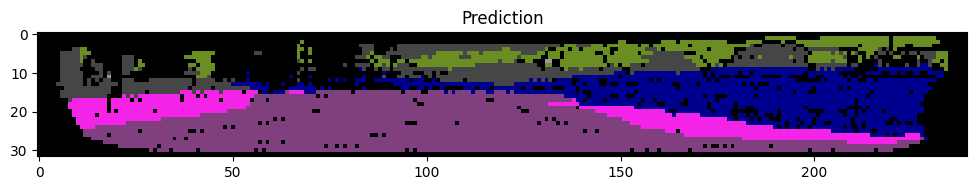

(32, 240)
(7680,)
(7680,)
(7680, 3)


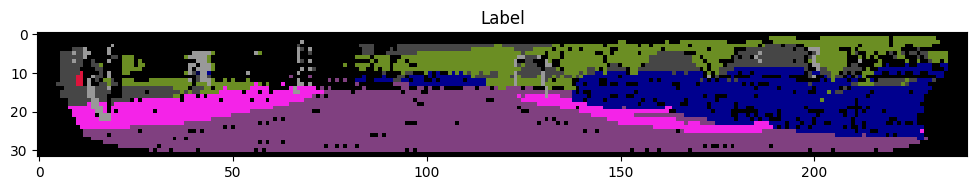

In [ ]:
image = segmentation_map_to_rgb_encoding(predictions.numpy(), cfg.CLS_COLOR_MAP)
plt.imshow(image)
plt.title("Prediction")
plt.show()

image = segmentation_map_to_rgb_encoding(label, cfg.CLS_COLOR_MAP)
plt.imshow(image)
plt.title("Label")
plt.show()

In [ ]:
# Convert lidar data to numpy ndarray
points = lidar.numpy()
class_ids = predictions.numpy()

# Convert predictions into color encoding
colors = segmentation_map_to_rgb_encoding(class_ids, cfg.CLS_COLOR_MAP)
colors = colors.reshape((-1, 3))

# Reshape into a list of points
points = points.reshape((-1, 6))

# Denormalize back to original mean and std
points = (points[:, :5] * cfg.INPUT_STD) + cfg.INPUT_MEAN

# Remove unecessary 1st dimension
points = np.squeeze(points)

# Get x, y, z coordinates
points = points[:, :3]

fig = go.Figure(
    data=[
        go.Scatter3d(
            x=points[:,0], y=points[:,1], z=points[:,2],
            mode='markers',
            marker=dict(size=1.75, color=colors)
        )
    ],
    layout=dict(
        scene=dict(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False)
        )
    )
)
fig.show()

(32, 240)
(7680,)
(7680,)
(7680, 3)
